In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split


from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("result_df.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data = data.fillna(0)

print(data.shape)
data.head()

(55315, 22)


,HADM_ID,ICU_stay_time,ITEMID_211.0,ITEMID_742.0,ITEMID_646.0,ITEMID_618.0,ITEMID_212.0,ITEMID_161.0,ITEMID_128.0,ITEMID_550.0,...,ITEMID_220210.0,ITEMID_220277.0,ITEMID_159.0,ITEMID_1484.0,ITEMID_51.0,ITEMID_8368.0,ITEMID_52.0,ITEMID_220048.0,ITEMID_227969.0,ITEMID_224650.0
0,180021.0,37540.0,268.0,261.0,263.0,254.0,225.0,216.0,243.0,220.0,...,0.0,0.0,190.0,227.0,185.0,164.0,196.0,0.0,0.0,0.0
1,178017.0,5325.0,50.0,48.0,51.0,53.0,45.0,41.0,33.0,41.0,...,0.0,0.0,18.0,48.0,8.0,4.0,10.0,0.0,0.0,0.0
2,182760.0,8570.0,65.0,67.0,64.0,80.0,72.0,73.0,50.0,72.0,...,0.0,0.0,49.0,62.0,43.0,34.0,40.0,0.0,0.0,0.0
3,168287.0,31440.0,263.0,261.0,254.0,271.0,256.0,176.0,234.0,237.0,...,0.0,0.0,88.0,244.0,181.0,198.0,206.0,0.0,0.0,0.0
4,160495.0,37290.0,313.0,305.0,313.0,299.0,254.0,271.0,304.0,306.0,...,0.0,0.0,277.0,0.0,248.0,263.0,238.0,0.0,0.0,0.0


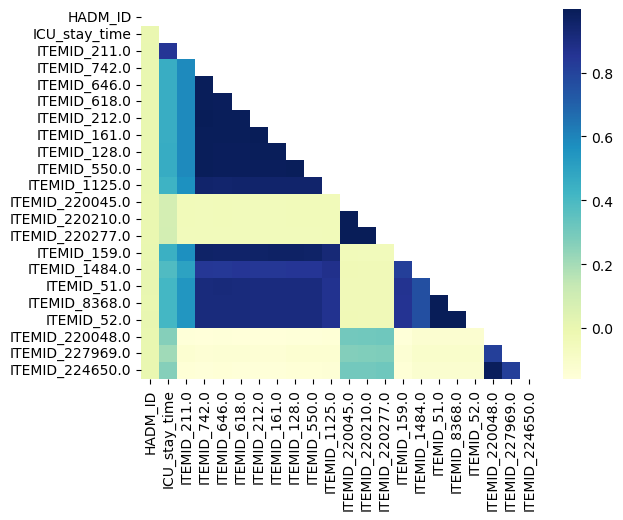

In [15]:
# creating mask 
mask = np.triu(np.ones_like(data.corr())) 
  
# plotting a triangle correlation heatmap 
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", mask=mask) 
  
# displaying heatmap 
plt.show() 

In [3]:
X = data.drop(['ICU_stay_time'], axis=1)
y = data['ICU_stay_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

In [50]:
def CreateModel(input):
    model = Sequential()
    
    # The Input Layer :
    model.add(Dense(128, input_dim = input.shape[1], kernel_initializer='normal', activation='relu'))

    # The Hidden Layers :
    model.add(Dense(128, kernel_initializer='normal',activation='relu'))
    #model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    #model.add(Dense(256, kernel_initializer='normal',activation='relu'))

    # The Output Layer :
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    
    return model

In [63]:
model = CreateModel(X_train)
model.summary()

c:\Users\anton\anaconda3\envs\INV\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,457 (76.00 KB)

 Trainable params: 19,457 (76.00 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
EPOCHS = 200

# Train model
model_1 = model.fit(
    X_train, y_train, 
    epochs = EPOCHS,
    batch_size = 128, 
    validation_data = (X_val, y_val)
) 

Epoch 1/200
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6378.9292 - mean_absolute_error: 6378.9399 - val_loss: 4412.5781 - val_mean_absolute_error: 4434.0835
Epoch 2/200
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3764.5674 - mean_absolute_error: 3764.5769 - val_loss: 3359.8728 - val_mean_absolute_error: 3378.6887
Epoch 3/200
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3183.9089 - mean_absolute_error: 3183.9146 - val_loss: 3142.8679 - val_mean_absolute_error: 3160.0752
Epoch 4/200
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2868.0061 - mean_absolute_error: 2868.0125 - val_loss: 2738.1555 - val_mean_absolute_error: 2754.1714
Epoch 5/200
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2533.8218 - mean_absolute_error: 2533.8145 - val_loss: 2584.0818 - val_mean_absolute_error: 2597.5027
Epoch 6/200
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2367.7480 - mean_absolute_error: 2367.7510 - val_loss: 2706.2949 - val_mean_absolute_error: 2719.7561
Epoch 7/200
346/346 ━━

In [65]:
# Predict unseen data
#y_pred = model.predict(X_test)

TestLoss, Testacc = model.evaluate(X_test, y_test)
print(f"Loss: {TestLoss}, Accuracy: {Testacc}")

# Save fold results
m_metrics = {
    'loss': TestLoss, 
    'accuracy': Testacc,
    'history': model, 
    'history_dict': model_1.history
}

260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1279.1385 - mean_absolute_error: 1279.1517
Loss: 1246.6961669921875, Accuracy: 1248.4180908203125


In [57]:
print(m_metrics['history_dict'].keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


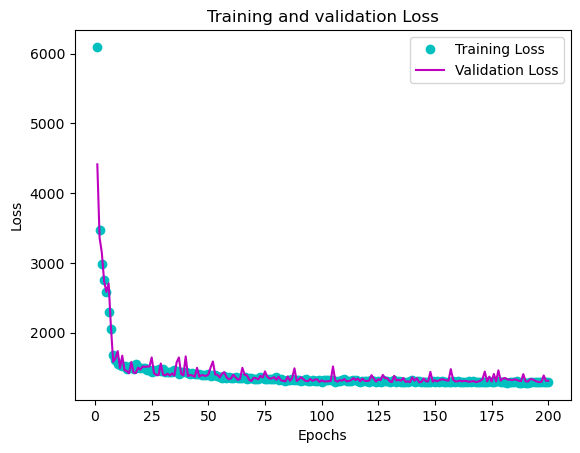

In [66]:
epochs = range(1, EPOCHS + 1)
ax = plt.subplot()

history_dict = m_metrics.get('history_dict')
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

ax.plot(epochs,loss_values,'co',label='Training Loss')
ax.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

ax.set_title('Training and validation Loss')
ax.set_xlabel('Epochs')

ax.legend()
plt.show()

In [ ]:
Try xgboost 